# Material Informatics(MTN-316)
## Tutorial - 3 (G-4)
### Name : Subhadip Mandal , Harsh Raj Bharti , Sorra Sai Teja
### Enrollment No : 20118091 , 20118034 , 20118089

In [64]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from CBFV.composition import generate_features
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [66]:
df= pd.read_excel(r"C:\Users\DELL\Desktop\informatics\TC_data.xlsx")

In [67]:
df.head()

,Formula,Temp,ThermalConductivity
0,Ag0.04Bi0.45Sb1.41Te2.8,320,1.38
1,Ag0.04Bi0.45Sb1.41Te2.8,500,1.18
2,Ag0.04Pb0.9Sb0.05Te,300,1.18
3,Ag0.04Pb0.9Sb0.05Te,673,0.80
4,Ag0.05Pb0.85Sn0.05Sb0.05Te,300,1.43


In [68]:
df = df.rename(columns={"ThermalConductivity" : "target" , "Formula" : "formula" , "Temp" : "temp"})
df.head()

,formula,temp,target
0,Ag0.04Bi0.45Sb1.41Te2.8,320,1.38
1,Ag0.04Bi0.45Sb1.41Te2.8,500,1.18
2,Ag0.04Pb0.9Sb0.05Te,300,1.18
3,Ag0.04Pb0.9Sb0.05Te,673,0.80
4,Ag0.05Pb0.85Sn0.05Sb0.05Te,300,1.43


In [69]:
from CBFV import composition
X, y, formulae, skipped = composition.generate_features(df, elem_prop ='oliynyk', drop_duplicates = False, extend_features = True, sum_feat=False)

Processing Input Data: 100%|███████████████████████████████████████████████████████| 425/425 [00:00<00:00, 9441.93it/s]


	Featurizing Compositions...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 425/425 [00:00<00:00, 4829.29it/s]


	Creating Pandas Objects...


In [70]:
X.head()

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,temp
0,54.625532,133.471807,5.095745,15.561702,5.887234,0.104255,0.895745,0.0,87.904255,0.991489,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,320
1,54.625532,133.471807,5.095745,15.561702,5.887234,0.104255,0.895745,0.0,87.904255,0.991489,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,500
2,65.442211,163.056647,5.452261,14.969849,5.507538,0.472362,0.527638,0.0,85.301508,0.979899,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,300
3,65.442211,163.056647,5.452261,14.969849,5.507538,0.472362,0.527638,0.0,85.301508,0.979899,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,673
4,64.550000,160.568455,5.425000,14.950000,5.500000,0.475000,0.525000,0.0,85.175000,0.975000,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,300


In [71]:
list(X.columns)

['avg_Atomic_Number',
 'avg_Atomic_Weight',
 'avg_Period',
 'avg_group',
 'avg_families',
 'avg_Metal',
 'avg_Nonmetal',
 'avg_Metalliod',
 'avg_Mendeleev_Number',
 'avg_l_quantum_number',
 'avg_Atomic_Radius',
 'avg_Miracle_Radius_[pm]',
 'avg_Covalent_Radius',
 'avg_Zunger_radii_sum',
 'avg_ionic_radius',
 'avg_crystal_radius',
 'avg_Pauling_Electronegativity',
 'avg_MB_electonegativity',
 'avg_Gordy_electonegativity',
 'avg_Mulliken_EN',
 'avg_Allred-Rockow_electronegativity',
 'avg_metallic_valence',
 'avg_number_of_valence_electrons',
 'avg_gilmor_number_of_valence_electron',
 'avg_valence_s',
 'avg_valence_p',
 'avg_valence_d',
 'avg_valence_f',
 'avg_Number_of_unfilled_s_valence_electrons',
 'avg_Number_of_unfilled_p_valence_electrons',
 'avg_Number_of_unfilled_d_valence_electrons',
 'avg_Number_of_unfilled_f_valence_electrons',
 'avg_outer_shell_electrons',
 'avg_1st_ionization_potential_(kJ/mol)',
 'avg_polarizability(A^3)',
 'avg_Melting_point_(K)',
 'avg_Boiling_Point_(K)',


In [72]:
X = X.drop(columns=['avg_thermal_conductivity_(W/(m_K))_','dev_thermal_conductivity_(W/(m_K))_'])
X.head()

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,temp
0,54.625532,133.471807,5.095745,15.561702,5.887234,0.104255,0.895745,0.0,87.904255,0.991489,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,320
1,54.625532,133.471807,5.095745,15.561702,5.887234,0.104255,0.895745,0.0,87.904255,0.991489,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,500
2,65.442211,163.056647,5.452261,14.969849,5.507538,0.472362,0.527638,0.0,85.301508,0.979899,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,300
3,65.442211,163.056647,5.452261,14.969849,5.507538,0.472362,0.527638,0.0,85.301508,0.979899,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,673
4,64.550000,160.568455,5.425000,14.950000,5.500000,0.475000,0.525000,0.0,85.175000,0.975000,...,722.65,1262.95,6.24,0.2,17.49,52.55,2.35,197.0,2.19,300


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train

,avg_Atomic_Number,avg_Atomic_Weight,avg_Period,avg_group,avg_families,avg_Metal,avg_Nonmetal,avg_Metalliod,avg_Mendeleev_Number,avg_l_quantum_number,...,mode_Melting_point_(K),mode_Boiling_Point_(K),mode_Density_(g/mL),mode_specific_heat_(J/g_K)_,mode_heat_of_fusion_(kJ/mol)_,mode_heat_of_vaporization_(kJ/mol)_,mode_thermal_conductivity_(W/(m_K))_,mode_heat_atomization(kJ/mol),mode_Cohesive_energy,temp
17,45.500000,108.197800,4.750000,14.000000,5.250000,0.500000,0.500000,0.000000,79.750000,0.750000,...,722.65,1262.95,6.24,0.200,17.490,52.55,2.35,197.0,2.19,300
66,17.410000,36.691734,3.333333,11.410000,5.110000,0.556667,0.443333,0.000000,68.116667,1.333333,...,1683.15,2628.15,2.33,0.710,50.550,384.22,148.00,452.0,4.63,373
132,44.666667,104.086800,4.833333,9.333333,4.333333,1.000000,0.000000,0.000000,61.833333,1.666667,...,505.15,2543.15,7.31,0.227,7.029,295.80,66.60,302.0,3.14,300
222,66.250000,164.880400,5.500000,14.250000,5.375000,0.625000,0.375000,0.000000,81.750000,1.000000,...,576.15,1730.15,11.90,0.130,4.142,164.10,46.10,182.0,1.88,300
31,36.044444,83.219037,4.340741,11.911111,5.185185,0.259259,0.000000,0.740741,67.207407,0.962963,...,1220.55,3103.15,5.32,0.320,36.940,330.90,59.90,377.0,3.85,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,44.268571,105.528583,4.822857,11.457143,4.551429,0.571429,0.428571,0.000000,64.654286,1.462857,...,722.65,1262.95,6.24,0.200,17.490,52.55,2.35,197.0,2.19,614
106,37.155000,86.233700,4.255000,14.495000,5.995000,0.255000,0.745000,0.000000,81.730000,1.250000,...,490.15,958.15,4.79,0.320,6.694,37.70,0.52,227.0,2.46,5
270,41.687500,95.959812,4.750000,9.312500,4.312500,1.000000,0.000000,0.000000,61.562500,1.687500,...,505.15,2543.15,6.51,0.227,7.029,295.80,22.70,302.0,3.14,300
348,54.666667,131.036773,5.333333,9.333333,4.333333,0.666667,0.333333,0.000000,60.000000,2.000000,...,904.15,2223.15,6.69,0.160,12.200,77.14,16.20,262.0,2.75,200


# Q1.
### Build RandomForestRegressor, SVR, KNeighborsRegressor, and GradientBoostingRegressor models on given dataset (link) and predict the thermal conductivity value.

In [75]:
rfreg = RandomForestRegressor()
svr = SVR()
knreg = KNeighborsRegressor()
gbreg = GradientBoostingRegressor()

In [76]:
rfreg.fit(X_train , y_train)

RandomForestRegressor()

In [80]:
rfpred = rfreg.predict(X_test)
rfpred


array([ 1.2633    ,  1.86985   ,  1.4354    ,  3.10625   ,  4.7406    ,
        7.3957    ,  2.7979    ,  3.1194    ,  1.6171    ,  6.3006    ,
        0.7619    ,  1.61157   ,  2.331     ,  6.2559    ,  2.6122    ,
        1.3766    , 10.4557    ,  1.58485   ,  1.2241    ,  4.7603    ,
        1.5703    ,  1.68077   ,  5.89923333,  7.5765    ,  1.4372    ,
        2.7345    ,  4.66135   ,  1.4185    , 25.1521    ,  4.7354    ,
        1.0288    ,  2.8984    ,  1.11294   ,  7.212     ,  1.9918    ,
        2.79936667,  6.607     , 17.4469    ,  5.10857   ,  1.5259    ,
        2.2613    ,  2.0095    ,  1.648     ,  2.6835    ,  2.46255   ,
        9.7469    ,  4.46041   ,  2.81326667, 10.21306667,  2.44938667,
        5.29205   , 12.33766667,  1.4826    ,  1.1308    ,  5.7244    ,
        8.7610945 , 13.5813    ,  5.9508    , 11.547     ,  1.41577   ,
        2.87      , 18.6444    ,  1.5931    ,  4.39595   ,  3.8247    ,
        2.31935   ,  1.45315   ,  1.5832    ,  1.6924    ,  3.23

In [82]:
rfreg.score(X_test , y_test)

0.7327110994161611

In [83]:
svr.fit(X_train , y_train)

SVR()

In [84]:
svrpred = svr.predict(X_test)
svrpred

array([1.19072005, 1.00431633, 1.11780043, 2.27229235, 5.03910862,
       4.18097445, 3.57415265, 3.57428159, 4.02257374, 3.47746356,
       1.32169808, 1.94897793, 3.56281331, 5.80335812, 3.16668889,
       1.13445804, 4.79523183, 0.97383033, 1.67469536, 6.40932758,
       1.17240195, 2.93633686, 4.70440543, 3.56527943, 1.20808699,
       3.57898593, 1.08179236, 1.33939254, 5.33236958, 3.17305725,
       1.45386503, 3.06318124, 1.13077481, 4.54986304, 1.83997048,
       3.41695848, 4.23194222, 6.90081783, 5.82521691, 1.83927152,
       1.32171047, 3.35171455, 0.98749638, 1.85903401, 2.706359  ,
       5.25073158, 5.33195555, 3.4110163 , 5.70717315, 4.2202259 ,
       4.11504203, 5.51293776, 3.73336768, 1.25180296, 3.39812426,
       4.74109085, 4.32308789, 4.34282698, 4.62241384, 1.05183303,
       3.06626723, 5.76296198, 0.99773963, 1.32954527, 5.20104557,
       4.24523651, 1.10959116, 1.1338317 , 1.13454983, 3.09718324,
       3.74210481, 4.02906904, 1.14852245, 5.06079909, 3.99222

In [87]:
svr.score(X_test, y_test)

0.22229346039466102

In [89]:
knreg.fit(X_train , y_train)

KNeighborsRegressor()

In [94]:
predknr= knreg.predict(X_test)
predknr

array([ 1.606 ,  1.453 ,  1.134 ,  7.    ,  4.89  ,  6.5   ,  2.512 ,
        2.772 ,  1.278 ,  6.24  ,  0.816 ,  1.214 ,  2.19  ,  6.07  ,
        2.374 ,  1.086 ,  7.206 ,  1.636 ,  6.62  ,  6.22  ,  1.606 ,
        2.492 , 11.836 ,  3.948 ,  1.086 ,  2.434 ,  1.586 ,  1.36  ,
       11.1   ,  4.6   ,  2.5   ,  3.172 ,  1.086 ,  8.24  ,  1.408 ,
        1.79  ,  5.88  ,  9.51  ,  5.42  ,  1.408 ,  1.576 ,  1.79  ,
        1.636 ,  6.758 ,  5.6   ,  4.778 ,  6.102 ,  1.79  , 10.5   ,
        5.822 ,  5.282 , 15.96  ,  1.48  ,  1.292 ,  2.772 ,  5.046 ,
        8.74  ,  4.786 ,  8.062 ,  1.2774,  3.172 , 17.468 ,  1.636 ,
        2.922 , 10.656 ,  5.822 ,  1.086 ,  1.46  ,  1.134 ,  3.312 ,
        1.338 ,  1.274 ,  2.922 ,  6.592 ,  1.278 ,  6.47  ,  4.936 ,
        2.628 ,  2.422 ,  3.938 ,  7.034 ,  2.422 ,  3.036 ,  2.676 ,
        3.042 ])

In [95]:
knreg.score(X_test, y_test)

0.37821056779056395

In [97]:
gbreg.fit(X_train , y_train)

GradientBoostingRegressor()

In [98]:
predgbr= gbreg.predict(X_test)
predgbr

array([ 1.6263849 ,  2.48703643,  1.30523236,  5.5084418 ,  3.90473326,
        7.49870065,  2.84287669,  3.14252079,  1.01745759,  5.71054341,
        0.74554091,  1.52115715,  2.45573469,  5.70760446,  3.14460098,
        1.57921077,  9.59857661,  1.39717569,  1.00688144,  4.48590533,
        1.76519788,  1.80184723,  7.79162139,  6.56486361,  1.69532374,
        2.4598691 ,  6.80822008,  0.99710982, 32.00239754,  4.90328889,
        1.44944368,  3.05659307,  1.31429011,  6.94058705,  1.66911035,
        2.87402197,  6.79292401, 22.56714123,  4.75961696,  1.99290983,
        2.6941446 ,  1.58702811,  1.57672654,  2.29069791,  2.41958731,
        8.19849038,  4.42254113,  2.36030162, 11.52877749,  2.00627326,
        5.43842562, 12.85015984,  1.27197226,  1.49090126,  4.69887628,
        8.66379426, 13.8485236 ,  8.27175761, 11.92587082,  1.37662269,
        3.09083169, 17.57508893,  1.48002648,  5.46131969,  5.3244773 ,
        1.64248721,  1.66465282,  1.35027405,  1.55181928,  3.24

In [99]:
gbreg.score(X_test, y_test)

0.681740538778512

# Q2.
### Calculate r2_score, mean absolute error, and mean squared error for every model.

In [101]:
#defining function

def checkModel(y , pred):
    print("Mean squared error: %.2f" % mean_squared_error(y,pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y,pred))
    print("Coefficient of determination: %.2f" % r2_score(y,pred))
    
print("For RandomForestRegressor : ")
checkModel(y_test , rfpred)
print("-------------------------------")
print("For SVR : ")
checkModel(y_test , svrpred)
print("-------------------------------")
print("For KKNeighborsRegressor : ")
checkModel(y_test ,predknr)
print("-------------------------------")
print("For GradientBoostingRegressor : ")
checkModel(y_test , predgbr)

For RandomForestRegressor : 
Mean squared error: 7.00
Mean absolute error: 1.50
Coefficient of determination: 0.73
-------------------------------
For SVR : 
Mean squared error: 20.37
Mean absolute error: 2.48
Coefficient of determination: 0.22
-------------------------------
For KKNeighborsRegressor : 
Mean squared error: 16.29
Mean absolute error: 2.41
Coefficient of determination: 0.38
-------------------------------
For GradientBoostingRegressor : 
Mean squared error: 8.34
Mean absolute error: 1.68
Coefficient of determination: 0.68


# Q3 
### Plot the parity curve between predicted and original values of thermal conductivities for every model.

Parity plot
RandomForest Regressor


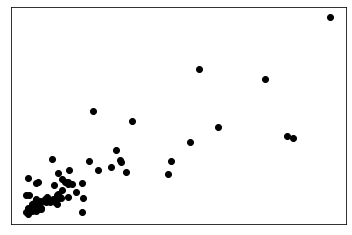

SVR


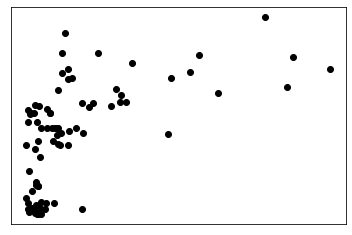

KNeighbors Regressor


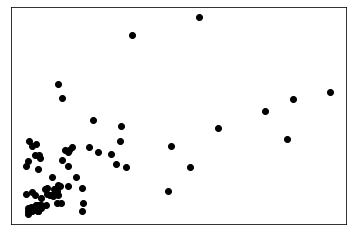

Gradient Boosting Regressor


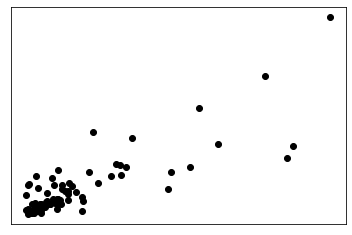

In [112]:
#defining function 
def modelPlot(y, pred, ):
    plt.scatter(y,pred, color="black")
    plt.xticks(())
    plt.yticks(())
    plt.show()
    

print('Parity plot')
print('RandomForest Regressor')
modelPlot(y_test , rfpred)
print('SVR')
modelPlot(y_test,svrpred)
print('KNeighbors Regressor')
modelPlot(y_test,predknr)
print('Gradient Boosting Regressor')
modelPlot(y_test,predgbr)

# Q4
### Comment on the model’s performances based on the parity curves.

On having a look on the Coeffcient of determination(R^2) value of all the four models:


RandomForestRegressor: ~0.73

Support Vector Regressor(SVR): ~0.22

KNeighbors Regressor: ~0.38

Gradient Boosting Regressor: ~0.68



We can see that the R^2 value of Random forest regressor and gradient boosting regressor is high as compared to that of the other two models.

From the above parity plots of the models, we can say that for the Random forest regressor, almost all points are aligned along a linear line with with very few outliers, showing high accuracy.
While, in the support vector regressor, we see that the points are randomly scattered with no specific alignment , showing very low accuracy.
In Kneighbor regressor, we see that the points are non-linearly scattered ,showing low accuracy.
Atlast, in gradient boosting regressor, we see that the points are linearly aligned with very less standard deviation ,showing very high accuracy.

Thus Out of the four Models, we can conclude that Random Forest Regressor and Gradient Boosting Regressor are showing better accuracy.